## <center>КУРСОВОЙ ПРОЕКТ<a class="anchor" id="practice"></a><center>

**Подключение библиотек и скриптов**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter('ignore')

**Пути к директориям и файлам**

In [3]:
#input
DATASET_PATH = 'D:\GeekBrains\Courses\Probability and Mathematics Statistics\Course project\\insurance.csv'


**Загрузка данных**

In [4]:
df = pd.read_csv(DATASET_PATH)
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


**Просмотр содержимого датасета**

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.shape

(1338, 7)

**Выделение целевой переменной и признаков**

In [8]:
FEATURE_NAMES = ['age','sex', 'bmi','children','smoker','region']
FEATURE_NAMES

['age', 'sex', 'bmi', 'children', 'smoker', 'region']

In [9]:
NUM_FEATURE_NAMES = ['age','bmi','children']
NUM_FEATURE_NAMES

['age', 'bmi', 'children']

In [10]:
target = ['charges']
target

['charges']

In [11]:
X = pd.DataFrame(df, columns=FEATURE_NAMES)
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [12]:
y = pd.DataFrame(df, columns=target)
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [13]:
TARGET_NAME = 'charges'
TARGET_NAME

'charges'

**Графический анализ данных**

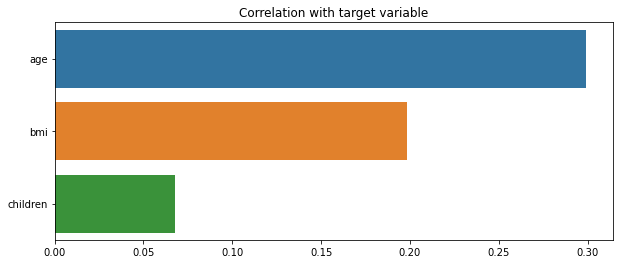

In [14]:
corr_with_target = df[NUM_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 4))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

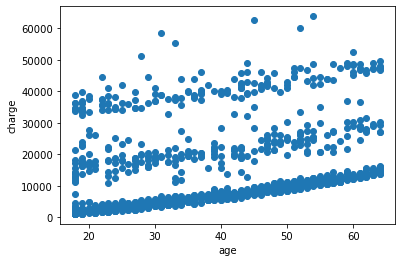

In [15]:
plt.scatter(df['age'],y)
plt.xlabel('age')
plt.ylabel('charge')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

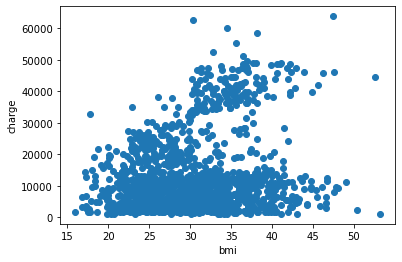

In [16]:
plt.scatter(df['bmi'],y)
plt.xlabel('bmi')
plt.ylabel('charge')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

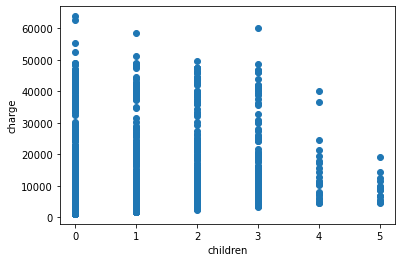

In [17]:
plt.scatter(df['children'],y)
plt.xlabel('children')
plt.ylabel('charge')
plt.show

**Построение модели линейной регрессии**

In [18]:
X = pd.DataFrame(df, columns=NUM_FEATURE_NAMES)
X.head()
X = np.hstack([np.ones((1338,1)),X])
X

array([[ 1.  , 19.  , 27.9 ,  0.  ],
       [ 1.  , 18.  , 33.77,  1.  ],
       [ 1.  , 28.  , 33.  ,  3.  ],
       ...,
       [ 1.  , 18.  , 36.85,  0.  ],
       [ 1.  , 21.  , 25.8 ,  0.  ],
       [ 1.  , 61.  , 29.07,  0.  ]])

In [19]:
y = np.array(y)
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [20]:
b = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T@y)
b # ~ 5.88982042

array([[-6916.24334779],
       [  239.99447429],
       [  332.0833645 ],
       [  542.86465225]])

In [21]:
X[:,1:2]

array([[19.],
       [18.],
       [28.],
       ...,
       [18.],
       [21.],
       [61.]])

In [22]:
y_hat = b[0]+b[1]*X[:,1:2]+b[2]*X[:,2:3]+b[3]*X[:,3:4]
y_hat # with intercept

array([[ 6908.77753344],
       [ 9160.97706103],
       [12390.94691779],
       ...,
       [ 9640.92917145],
       [ 6691.39141657],
       [17377.08299024]])

**Проверка качества модели**

In [23]:
n = 1338
mse = ((y-y_hat)**2).sum()/n
mse

128943244.63563193

In [24]:
R2 = 1-(((y_hat-y)**2).sum())/(((y-np.mean(y))**2).sum())
R2

0.1200981957624696

In [25]:
A_mean = 100 * np.mean(np.abs((y - y_hat) / y))
A_mean

113.60857815240078